# Skin Cancer Image Classification with Convolutional Neural Networks

# Aim:

To detect 7 different classes of skin cancer using Convolution Neural Network with keras tensorflow in backend and then analyse the result to see how the model can be useful in practical scenario.

# Target Audience:

1) Healthcare Sector <br>
2) Researchers

# Description of Dataset:

* Dermatoscopy is a widely used diagnostic technique that improves the diagnosis of benign and malignant pigmented skin lesions in comparison to examination with the unaided eye1. Dermatoscopic images are also a suitable source to train artificial neural networks to diagnose pigmented skin lesions automatically.
* Machine learning techniques set new benchmarks with regard to the complexity of neural networks and raised expectations that automated diagnostic systems will diagnose all kinds of pigmented skin lesions without the need of human expertise.
* The HAM10000 dataset, a large collection of multi-source dermatoscopic images of common pigmented skin lesions.
* It consists of 10015 dermatoscopicimages which are released as a training set for academic machine learning purposes and are publiclyavailable through the ISIC archive. This benchmark dataset can be used for machine learning and for comparisons with human experts.

It has 7 different classes of skin cancer which are listed below :

1. Melanocytic nevi
2. Melanoma
3. Benign keratosis-like lesions
4. Basal cell carcinoma
5. Actinic keratoses
6. Vascular lesions
7. Dermatofibroma

# Steps for model building and evaluation

Step 1: Importing Libraries<br>
Step 2: Reading and Processing Data<br>
Step 3: Data Cleaning<br>
Step 5: Exploratory data analysis (EDA)<br>
Step 6: Loading & Resizing of images<br>
Step 7: Array of Image<br>
Step 8: Splitting training and Validation split<br>
Step 9: One hot encoding<br>
Step 10: Reshaping image in 3 dimension<br>
Step 11: Model Building (CNN)<br>
Step 12: Setting Optimizer & Annealing<br>
Step 13: Fitting the model<br>
Step 14: Model Evaluation<br>
Step 15: Conclusion<br>
Step 16: Future Scope<br>
Step 17: References

# Importing Libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2 as cv
import seaborn as sns

# Reading and Processing data

In [8]:
data=pd.read_csv('HAM10000_metadata.csv')


In [9]:
data=data.drop(columns=['lesion_id'])


In [10]:
data.head()


,image_id,dx,dx_type,age,sex,localization
0,ISIC_0027419,bkl,histo,80.0,male,scalp
1,ISIC_0025030,bkl,histo,80.0,male,scalp
2,ISIC_0026769,bkl,histo,80.0,male,scalp
3,ISIC_0025661,bkl,histo,80.0,male,scalp
4,ISIC_0031633,bkl,histo,75.0,male,ear


In [11]:
data.columns

Index(['image_id', 'dx', 'dx_type', 'age', 'sex', 'localization'], dtype='object')

In [12]:
data.shape

(10015, 6)

# Data Cleaning

In [13]:
data.isnull().sum()

image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

In [14]:
data['age'].fillna((data['age'].mean()), inplace=True)

In [15]:
data.isnull().sum()

image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
dtype: int64

# Exploratory data analysis (EDA)

### Bargraph - Type of skin cancer, Technical validation, Localization and Sex

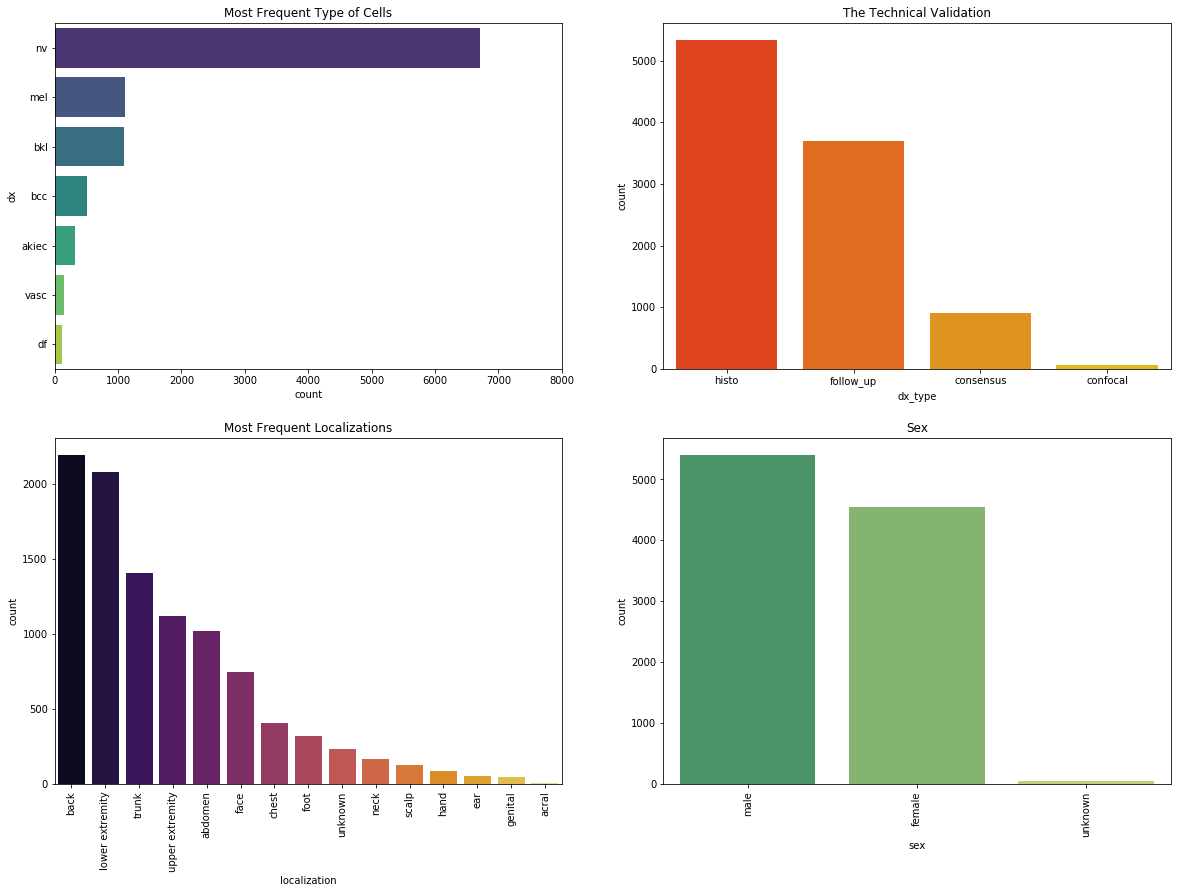

In [16]:
plt.figure(figsize = (20,14))

plt.subplot(2,2,1)
fig = sns.countplot(y = data['dx'], order = data['dx'].value_counts().index, palette= 'viridis')
plt.xticks(fig.get_xticks())
plt.title('Most Frequent Type of Cells')

plt.subplot(2,2,2)
fig = sns.countplot(x = data['dx_type'], order = data['dx_type'].value_counts().index, palette= 'autumn')
plt.xticks(fig.get_xticks())
plt.title('The Technical Validation')

plt.subplot(2,2,3)
fig = sns.countplot(x = data['localization'], order = data['localization'].value_counts().index, palette= 'inferno')
plt.xticks(fig.get_xticks(),rotation = 90)
plt.title('Most Frequent Localizations')

plt.subplot(2,2,4)
fig = sns.countplot(x = data['sex'], order = data['sex'].value_counts().index, palette= 'summer')
plt.xticks(fig.get_xticks(),rotation = 90)
plt.title('Sex')

# plt.tight_layout()
plt.show()

Observations:

* Plot 1: It can be seen that Melanocytic Nevi is around twice more than all of the other types combined.
* Plot 2: We can observe that histo and follow up are the most occuring ground truths.
* Plot 3: back and lower extremity are most frequent localizations on the body.
* Plot 4: There are slightly more males in the data. And few unknown values as well which could just be missings or other sex categories.

### Univariate Distribution of Age

([<matplotlib.axis.XTick at 0x21b98a137f0>,
 <a list of 10 Text xticklabel objects>)

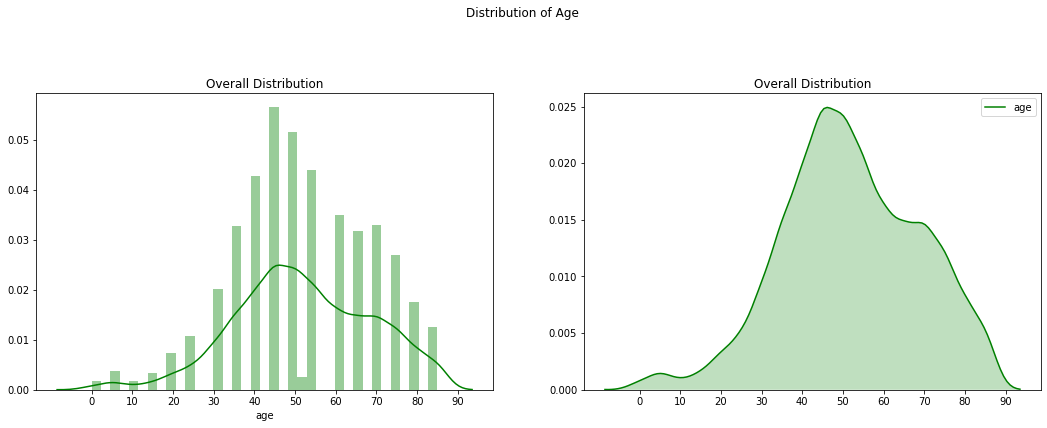

In [17]:
plt.figure(figsize=(18, 12))
plt.suptitle('Distribution of Age')

plt.subplot(2,2,1)
sns.distplot(data['age'], color= 'green')
plt.title('Overall Distribution')
plt.xticks(list(range(0,100,10)))

plt.subplot(2,2,2)
sns.kdeplot(data['age'], shade = True, color = 'green')
plt.title('Overall Distribution')
plt.xticks(list(range(0,100,10)))

Observations:

* It can be observed that most patients are in the age group of 35 to 65 with most in the range of 40-50.
* The males are mostly in the range 40-70.
* The females are in the range 30-60.

In [18]:
sns.set(color_codes = True)
df=pd.read_csv('HAM10000_metadata.csv')

### Countplot - Correlation between Types of Cancer and Age

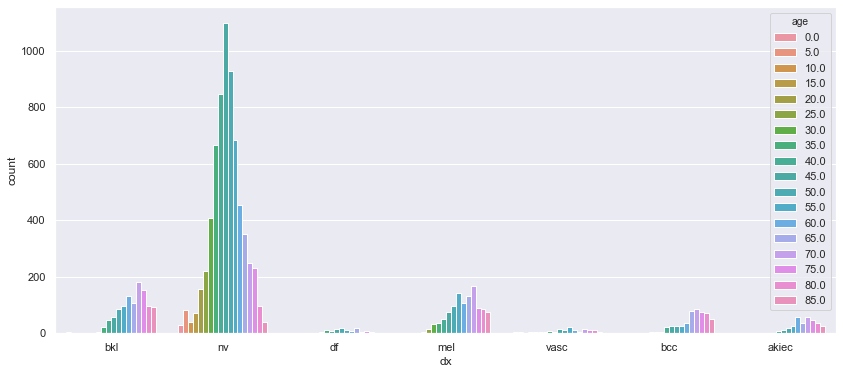

In [19]:
plt.figure(figsize=(14,6))
sns.countplot(x='dx',data=df,hue="age")

Observation : 
* It can be seen that Melanocytic Nevi is more prevalent with the age ranging from 35 to 45.
* Dermatofibroma is lowest seen skin cancer.

### Countplot - Correlation between Localization and Age

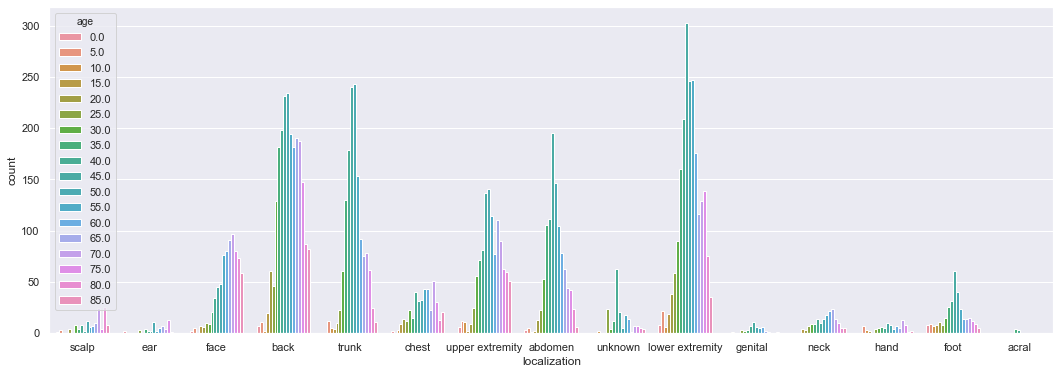

In [20]:
plt.figure(figsize=(18,6))
sns.countplot(x='localization',data=df,hue="age")

Observation:
* It is seen that cancer is causing more in lower extremity > back > trunk > abdomen localization. 
* Mostly observed in age from 30 to 50.

### Scatterplot - Age and Type of Cancer

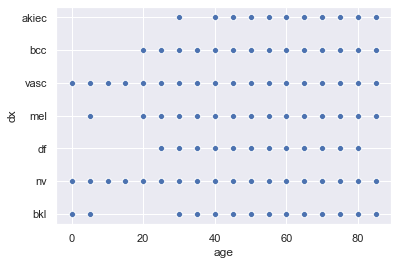

In [21]:
sns.scatterplot('age','dx',data=df)

Observation:
* It seems that skin cancer types Melanoma,Benign keratosis-like lesions,Basal cell carcinoma,Actinic keratoses,Dermatofibroma are not much prevalant below the age of 20 years

### Countplot - Correlation between Types of Cancer and Sex

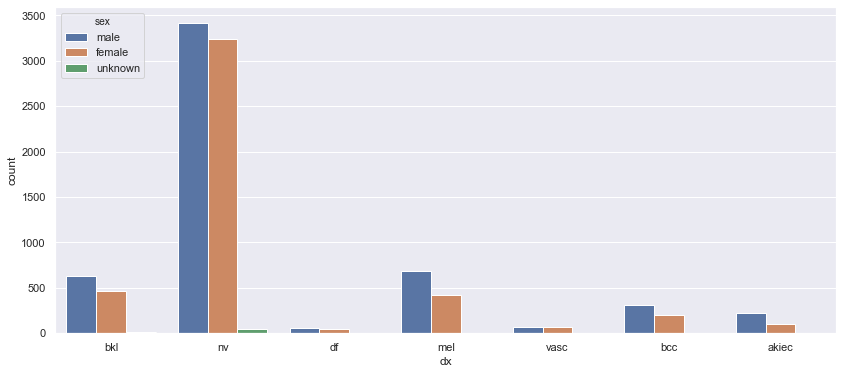

In [22]:
plt.figure(figsize=(14,6))
sns.countplot(x='dx',data=df,hue="sex")

Observation:
* Melanocytic Nevi is observed highest in both male and female.

### Countplot - Correlation between Technical Validation and Age

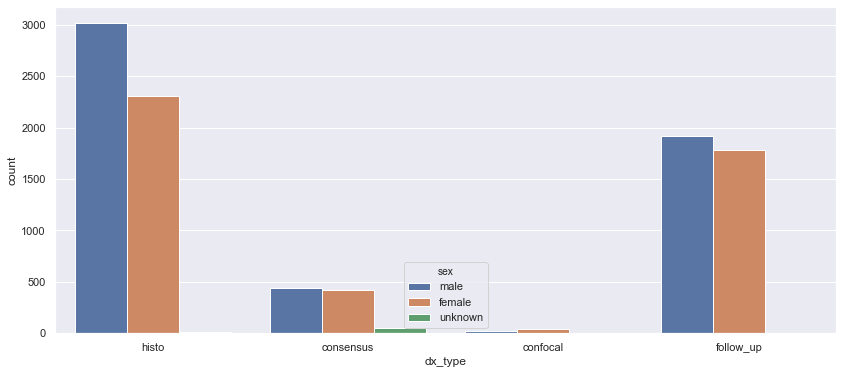

In [23]:
plt.figure(figsize=(14,6))
sns.countplot(x='dx_type',data=df,hue="sex")

Observation:
* We can observe that histo and follow up are the most occuring ground truths and number is greater in female than male.

### Boxplot -  Types of Cancer and Age

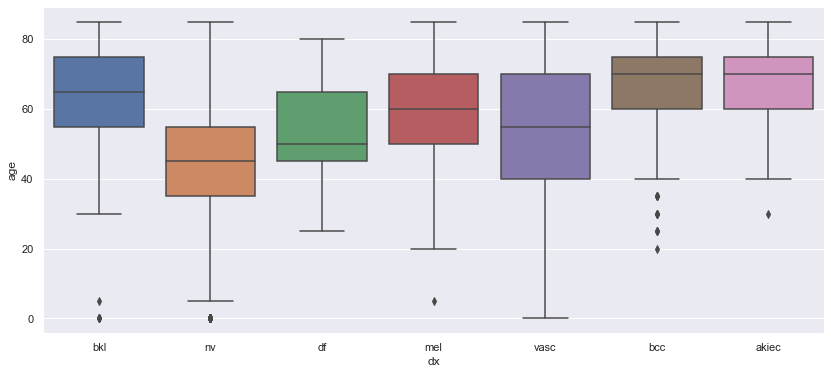

In [24]:
plt.figure(figsize=(14,6))
sns.boxplot(x='dx',y='age',data=data)

# Converting Categorical data to numeric form (Label Encoder)

In [25]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data.dx= le.fit_transform(data.dx)
data.dx_type= le.fit_transform(data.dx_type)
data.sex= le.fit_transform(data.sex)
data.localization= le.fit_transform(data.localization)

In [26]:
data

,image_id,dx,dx_type,age,sex,localization
0,ISIC_0027419,2,3,80.0,1,11
1,ISIC_0025030,2,3,80.0,1,11
2,ISIC_0026769,2,3,80.0,1,11
3,ISIC_0025661,2,3,80.0,1,11
4,ISIC_0031633,2,3,75.0,1,4
5,ISIC_0027850,2,3,75.0,1,4
6,ISIC_0029176,2,3,60.0,1,5
7,ISIC_0029068,2,3,60.0,1,5
8,ISIC_0025837,2,3,70.0,0,2
9,ISIC_0025209,2,3,70.0,0,2


### Heatmap - Correlation between all parameters

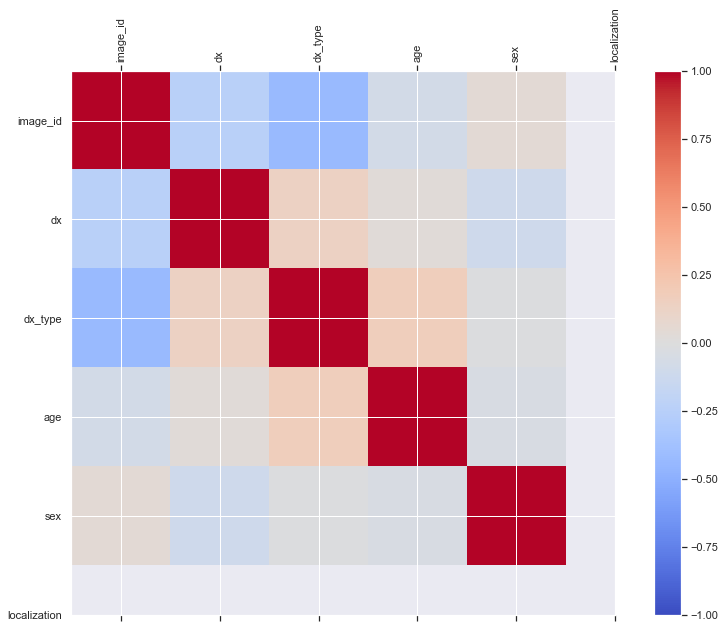

In [27]:
corr = data.corr()
fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

Observation:
* There is correlation between dx (type os cancer) and dx_type. 
* Also, there is correlation between age and dx_type.

# Loading and resizing of images

* In this step images will be loaded into the column named image from the image path from the image folder. 
* I also resize the images as the original dimension of images is large, and the processing them takes very long.

           image_id  dx  dx_type   age  sex  localization
0      ISIC_0027419   2        3  80.0    1            11
1      ISIC_0025030   2        3  80.0    1            11
2      ISIC_0026769   2        3  80.0    1            11
3      ISIC_0025661   2        3  80.0    1            11
4      ISIC_0031633   2        3  75.0    1             4
5      ISIC_0027850   2        3  75.0    1             4
6      ISIC_0029176   2        3  60.0    1             5
7      ISIC_0029068   2        3  60.0    1             5
8      ISIC_0025837   2        3  70.0    0             2
9      ISIC_0025209   2        3  70.0    0             2
10     ISIC_0025276   2        3  55.0    0            12
11     ISIC_0029396   2        3  85.0    0             3
12     ISIC_0025984   2        3  85.0    0             3
13     ISIC_0025767   2        3  70.0    1            12
14     ISIC_0032417   2        3  70.0    1            12
15     ISIC_0031326   2        3  65.0    1             2
16     ISIC_00

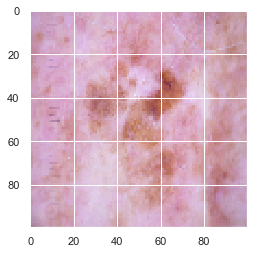

C:\Users\tanvi\Desktop\ml\HAM10000_images_part_1\ISIC_0025030.jpg


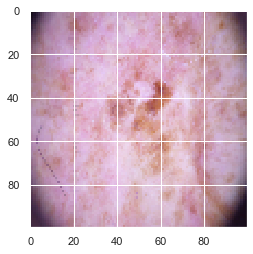

C:\Users\tanvi\Desktop\ml\HAM10000_images_part_1\ISIC_0026769.jpg


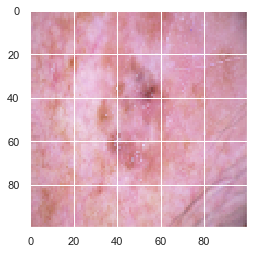

C:\Users\tanvi\Desktop\ml\HAM10000_images_part_1\ISIC_0025661.jpg


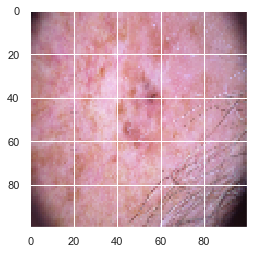

C:\Users\tanvi\Desktop\ml\HAM10000_images_part_1\ISIC_0031633.jpg


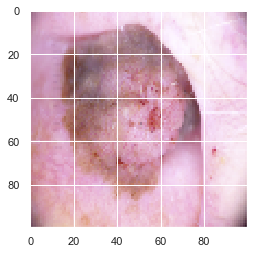

C:\Users\tanvi\Desktop\ml\HAM10000_images_part_1\ISIC_0027850.jpg


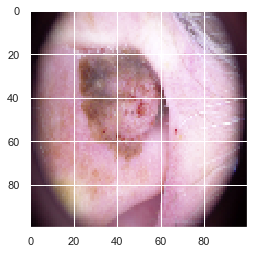

C:\Users\tanvi\Desktop\ml\HAM10000_images_part_1\ISIC_0029176.jpg


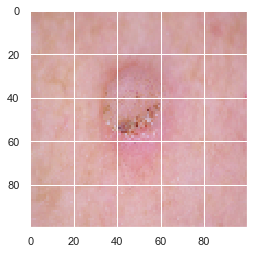

C:\Users\tanvi\Desktop\ml\HAM10000_images_part_1\ISIC_0029068.jpg


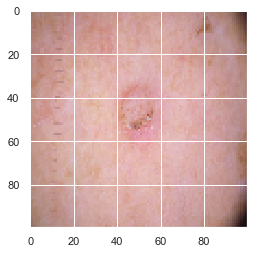

C:\Users\tanvi\Desktop\ml\HAM10000_images_part_1\ISIC_0025837.jpg


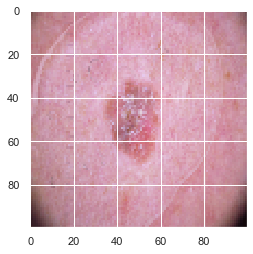

C:\Users\tanvi\Desktop\ml\HAM10000_images_part_1\ISIC_0025209.jpg


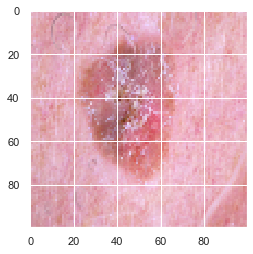

C:\Users\tanvi\Desktop\ml\HAM10000_images_part_1\ISIC_0025276.jpg


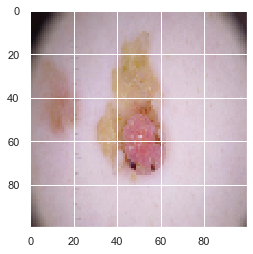

In [57]:
PATH= r"C:\Users\tanvi\Desktop\ml\HAM10000_images_part_1"
print(data)
#plot the data
count=0
for row in data.iterrows():
    
    
    #print(row[1][0])
   
    img_name=row[1][0]
    i_name=img_name+'.jpg'
    PA=os.path.join(PATH,i_name)
    img_arr=cv.imread(PA,1)
    print(PA)
    img_arr=cv.resize(img_arr,(100,100))
    img_arr=cv.cvtColor(img_arr,cv.COLOR_BGR2RGB)
    
    plt.imshow(img_arr)
    plt.show() 
    
    if count==10:
        break
    count+=1



PATH=r'C:\Users\tanvi\Desktop\ml\HAM10000_images_part_1'

#plot the data
count=0
image_value = []


for row in data.iterrows():
    
    
    #print(row[1][0])
    img_name=row[1][0]
    i_name=img_name+'.jpg'
    PA=os.path.join(PATH,i_name)
    img_arr=cv.imread(PA,1)
    img_arr=cv.resize(img_arr,(100,100))
    img_arr=cv.cvtColor(img_arr,cv.COLOR_BGR2RGB)
    image_value.append([img_arr,row[1][1] ])
    

In [58]:
len(image_value) #number of images

10015

# Array of Image

In [59]:
image_value[1][0]

array([[[24, 12, 22],
        [26, 15, 25],
        [26, 14, 27],
        ...,
        [62, 39, 65],
        [61, 39, 65],
        [61, 37, 65]],

       [[24, 12, 25],
        [23, 13, 25],
        [26, 15, 32],
        ...,
        [61, 38, 62],
        [63, 39, 65],
        [60, 35, 65]],

       [[22, 12, 23],
        [24, 16, 30],
        [31, 18, 43],
        ...,
        [60, 36, 59],
        [62, 38, 62],
        [59, 39, 64]],

       ...,

       [[65, 40, 62],
        [66, 42, 63],
        [65, 40, 62],
        ...,
        [26, 14, 28],
        [24, 14, 27],
        [24, 12, 25]],

       [[62, 40, 63],
        [65, 43, 66],
        [66, 42, 64],
        ...,
        [24, 16, 28],
        [26, 15, 29],
        [25, 13, 25]],

       [[61, 39, 63],
        [64, 42, 63],
        [66, 42, 65],
        ...,
        [27, 14, 29],
        [27, 14, 27],
        [24, 13, 23]]], dtype=uint8)

In [60]:
import random
random.shuffle(image_value)


In [61]:
X=[]
y=[]

for feature,label in image_value:
    X.append(feature)
    y.append(label)

len(X),len(y)

(10015, 10015)

# Splitting training and Validation split


Split the train set in two parts : a small fraction (20%) became the validation set which the model is evaluated and the rest (80%) is used to train the model.

In [62]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2)

In [63]:
from keras.utils import to_categorical

one_hot_train=to_categorical(train_y)
one_hot_train


array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

# One hot encoding

Labels are 7 different classes of skin cancer types from 0 to 6. We need to encode these lables to one hot vectors

In [64]:
one_hot_test=to_categorical(test_y)
one_hot_test


array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

# Reshape image in 3 dimensions

In [65]:
#array reshape
train_X=np.array(train_X).reshape(-1,100,100,3)
train_X=train_X/255.0
test_X=np.array(test_X).reshape(-1,100,100,3)
test_X=test_X/255.0

train_X.shape,test_X.shape,one_hot_train.shape,one_hot_test.shape


((8012, 100, 100, 3), (2003, 100, 100, 3), (8012, 7), (2003, 7))

# Model Building

* I used the Keras Sequential API, where you have just to add one layer at a time, starting from the input.

1) Convolution Layer

* It is like a set of learnable filters. I choosed to set 32 filters for the firsts conv2D layers, 64 and 128 filters for the two last ones. 

* Each filter transforms a part of the image (defined by the kernel size) using the kernel filter. The kernel filter matrix is applied on the whole image. Filters can be seen as a transformation of the image.

* The CNN can isolate features that are useful everywhere from these transformed images (feature maps).

2) MaxPool2D layer

* This layer simply acts as a downsampling filter. 
* It picks the maximal value. 
* These are used to reduce computational cost, and to some extent also reduce overfitting.
* Combining convolutional and pooling layers, CNN are able to combine local features and learn more global features of the image.

3) Dropout
* It is a regularization method, where a proportion of nodes in the layer are randomly ignored (setting their wieghts to zero) for each training sample. 
* This drops randomly a propotion of the network and forces the network to learn features in a distributed way. 
* This technique also improves generalization and reduces the overfitting.

4) 'relu' is the rectifier (activation function max(0,x). The rectifier activation function is used to add non linearity to the network.

5) Flatten
* This layer is use to convert the final feature maps into a one single 1D vector. 
* This flattening step is needed so that you can make use of fully connected layers after some convolutional/maxpool layers. 
* It combines all the found local features of the previous convolutional layers.

6) In the end we used the features in the Fully-Connected (FC-Dense) layers which is just artificial an neural networks (ANN) classifier.

7) In the last layer(Dense(10,activation="softmax")) the net outputs distribution of probability of each class

In [66]:
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [67]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(100,100,3),padding='same'))
model.add(MaxPooling2D((2, 2),padding='same'))
model.add(Dropout(0.20))

model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.40))

model.add(Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.20))

model.add(Flatten())

model.add(Dense(64, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(128, activation='linear'))
model.add(Dense(256, activation='linear'))
model.add(Dense(7, activation='softmax'))
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 100, 100, 32)      896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 25, 25, 128)      

# Setting Optimizer and Annealer

* Once our layers are added to the model, we need to set up a score function, a loss function and an optimisation algorithm.

* We define the loss function to measure how poorly our model performs on images with known labels. 

* It is the error rate between the oberved labels and the predicted ones. I used a specific form for categorical classifications (>2 classes) called the "categorical_crossentropy". 

* The optimizer function will iteratively improve parameters like filters kernel values, weights and bias of neurons. It helps to minimise the loss.

* I choosed Adam optimizer because it combines the advantages of two other extensions of following:

1) Adaptive Gradient Algorithm (AdaGrad) that maintains a per-parameter learning rate that improves performance on problems with sparse gradients (e.g. natural language and computer vision problems).

2) Root Mean Square Propagation (RMSProp) that also maintains per-parameter learning rates that are adapted based on the average of recent magnitudes of the gradients for the weight (e.g. how quickly it is changing). This means the algorithm does well on online and non-stationary problems (e.g. noisy).

* Adam realizes the benefits of both AdaGrad and RMSProp.

* Adam is a popular algorithm in the field of deep learning because it achieves good results fast.

* The metric function "accuracy" is used is to evaluate the performance our model. .

In [68]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Fitting the model

In this step finally we fit the model into x_train, y_train. In this step we have choosen batch size of 100.

In [69]:
history=model.fit(train_X,one_hot_train,batch_size=128,epochs=100,validation_split=0.2)

Train on 6409 samples, validate on 1603 samples
Epoch 1/100
6409/6409 [==============================] - 91s 14ms/step - loss: 1.1761 - accuracy: 0.6433 - val_loss: 1.2371 - val_accuracy: 0.6550
Epoch 2/100
6409/6409 [==============================] - 91s 14ms/step - loss: 0.9776 - accuracy: 0.6755 - val_loss: 1.0209 - val_accuracy: 0.6488
Epoch 3/100
6409/6409 [==============================] - 86s 13ms/step - loss: 0.9130 - accuracy: 0.6770 - val_loss: 0.9439 - val_accuracy: 0.6594
Epoch 4/100
6409/6409 [==============================] - 86s 13ms/step - loss: 0.8930 - accuracy: 0.6809 - val_loss: 0.9444 - val_accuracy: 0.6787
Epoch 5/100
6409/6409 [==============================] - 86s 13ms/step - loss: 0.8378 - accuracy: 0.6954 - val_loss: 0.9097 - val_accuracy: 0.6407
Epoch 6/100
6409/6409 [==============================] - 86s 13ms/step - loss: 0.8073 - accuracy: 0.7051 - val_loss: 0.8639 - val_accuracy: 0.6931
Epoch 7/100
6409/6409 [==============================] - 86s 13ms/step

6409/6409 [==============================] - 85s 13ms/step - loss: 0.2804 - accuracy: 0.9289 - val_loss: 1.3411 - val_accuracy: 0.7074
Epoch 57/100
6409/6409 [==============================] - 85s 13ms/step - loss: 0.0973 - accuracy: 0.9665 - val_loss: 1.4282 - val_accuracy: 0.7299
Epoch 58/100
6409/6409 [==============================] - 85s 13ms/step - loss: 0.0550 - accuracy: 0.9825 - val_loss: 1.6342 - val_accuracy: 0.7249
Epoch 59/100
6409/6409 [==============================] - 85s 13ms/step - loss: 0.0560 - accuracy: 0.9788 - val_loss: 1.6870 - val_accuracy: 0.7436
Epoch 60/100
6409/6409 [==============================] - 85s 13ms/step - loss: 0.0443 - accuracy: 0.9850 - val_loss: 1.8437 - val_accuracy: 0.7224
Epoch 61/100
6409/6409 [==============================] - 85s 13ms/step - loss: 0.0441 - accuracy: 0.9847 - val_loss: 1.8438 - val_accuracy: 0.7243
Epoch 62/100
6409/6409 [==============================] - 85s 13ms/step - loss: 0.0590 - accuracy: 0.9789 - val_loss: 1.9743 

# Model Evaluation

In [70]:
test_loss,test_acc=model.evaluate(test_X,one_hot_test)
test_loss,test_acc

2003/2003 [==============================] - 10s 5ms/step


(2.1663872755234443, 0.7219171524047852)

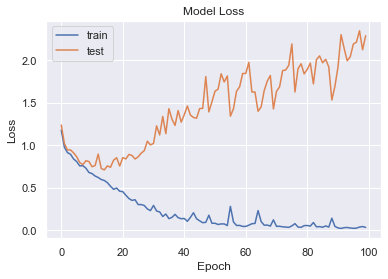

In [71]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()


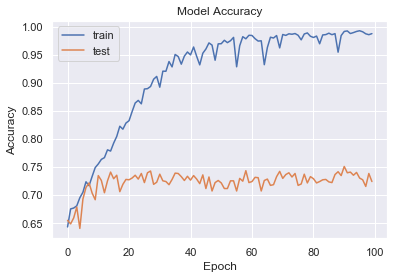

In [72]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy') 
plt.xlabel('Epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()


# Conclusion

Accuracy is higher if model is trained on more samples of lower resolution than small samples of high resolutions.
I have achieved the accuracy of 98%.

# Future Scope

Going forward, we can continue to refine the model to achieve a stable decrease in loss function with every epoch, build an interface such that given an image of a skin lesion within the two classes, the output will give a % probability of which of the seven classes it belongs to.

# References

[1] https://keras.io/examples/mnist_cnn/ <br>
[2] https://www.tensorflow.org/tutorials/images/cnn <br>
[3] https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-convolutional-neural-networks#layer